# 라이브러리 로드

In [2]:
# 데이터 분석에 사용할 라이브러리
import pandas as pd
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# error 창 안 보이게 해줌
import logging
logging.getLogger('matplotlib.font_manager').setLevel(logging.ERROR)

# 가용폰트 확인
for font in mpl.font_manager.findSystemFonts():
    # print(mpl.font_manager.FontProperties(fname=font).get_name())
    mpl.font_manager.fontManager.addfont(font)

# Set font family globally
mpl.rcParams['font.family'] = 'NanumBarunGothic'# 폰트명
print(mpl.rcParams['font.family'])

['NanumBarunGothic']


# 데이터 로드

In [3]:
import easydict
args = easydict.EasyDict()

# path 정보
args.default_path = 'C:/titanic_datas/'
args.train_csv = args.default_path+'train.csv'
args.test_csv = args.default_path+'test.csv'
args.default_submission_csv = args.default_path+'submission.csv'

args.submission_csv = args.default_path+'result/submission_0220.csv'
args.save_results = args.default_path+"result/model_results.json"

# 데이터 분석을 위한 변수들
args.random_state = 21
args.results = []

# Titanic 데이터

In [4]:
DATA_PATH = "C:/titanic_datas/"

df = pd.read_csv(DATA_PATH+"train.csv")
df.head()

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,0,2,"Wheeler, Mr. Edwin Frederick""""",male,NaN,0,0,SC/PARIS 2159,12.8750,NaN,S
1,1,0,3,"Henry, Miss. Delia",female,NaN,0,0,382649,7.7500,NaN,Q
2,2,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.0,1,1,12749,93.5000,B69,S
3,3,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,NaN,S
4,4,0,2,"Hold, Mr. Stephen",male,44.0,1,0,26707,26.0000,NaN,S


In [5]:
ori_train = pd.read_csv(args.train_csv)
ori_test = pd.read_csv(args.test_csv)

ori_train.shape, ori_test.shape

((916, 12), (393, 11))

In [6]:
pd.read_csv(args.default_submission_csv).shape

(393, 2)

In [7]:
ori_train.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'gender', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [8]:
ori_test.columns

Index(['passengerid', 'pclass', 'name', 'gender', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [9]:
ori_train.head()

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,0,2,"Wheeler, Mr. Edwin Frederick""""",male,NaN,0,0,SC/PARIS 2159,12.8750,NaN,S
1,1,0,3,"Henry, Miss. Delia",female,NaN,0,0,382649,7.7500,NaN,Q
2,2,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.0,1,1,12749,93.5000,B69,S
3,3,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,NaN,S
4,4,0,2,"Hold, Mr. Stephen",male,44.0,1,0,26707,26.0000,NaN,S


In [10]:
ori_train[['passengerid']].head()

,passengerid
0,0
1,1
2,2
3,3
4,4


In [11]:
ori_train.drop('passengerid', axis=1, inplace=True)
ori_train.head()

,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,2,"Wheeler, Mr. Edwin Frederick""""",male,NaN,0,0,SC/PARIS 2159,12.8750,NaN,S
1,0,3,"Henry, Miss. Delia",female,NaN,0,0,382649,7.7500,NaN,Q
2,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.0,1,1,12749,93.5000,B69,S
3,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,NaN,S
4,0,2,"Hold, Mr. Stephen",male,44.0,1,0,26707,26.0000,NaN,S


In [12]:
ori_test.set_index(['passengerid'], inplace=True)
print(f'{ori_test.shape}')
ori_test.head()

(393, 10)


,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
passengerid,,,,,,,,,,
916,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q
917,2,"Pinsky, Mrs. (Rosa)",female,32.0,0,0,234604,13.0000,NaN,S
918,3,"McCarthy, Miss. Catherine Katie""""",female,NaN,0,0,383123,7.7500,NaN,Q
919,3,"Franklin, Mr. Charles (Charles Fardon)",male,NaN,0,0,SOTON/O.Q. 3101314,7.2500,NaN,S
920,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S


In [13]:
ori_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  916 non-null    int64  
 1   pclass    916 non-null    int64  
 2   name      916 non-null    object 
 3   gender    916 non-null    object 
 4   age       736 non-null    float64
 5   sibsp     916 non-null    int64  
 6   parch     916 non-null    int64  
 7   ticket    916 non-null    object 
 8   fare      916 non-null    float64
 9   cabin     198 non-null    object 
 10  embarked  915 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 78.8+ KB


In [14]:
ori_tr = ori_train.copy()
ori_te = ori_test.copy()

# train_test_split

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
ori_te = ori_test.copy()

y = ori_train['survived']
X = ori_train.drop(['survived'], axis=1)

In [17]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.3, stratify=ori_train['survived'], random_state=args.random_state)

X_tr.shape, X_te.shape, y_tr.shape, y_te.shape

((641, 10), (275, 10), (641,), (275,))

# EDA

In [18]:
plt.style.use('seaborn-white')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

gender

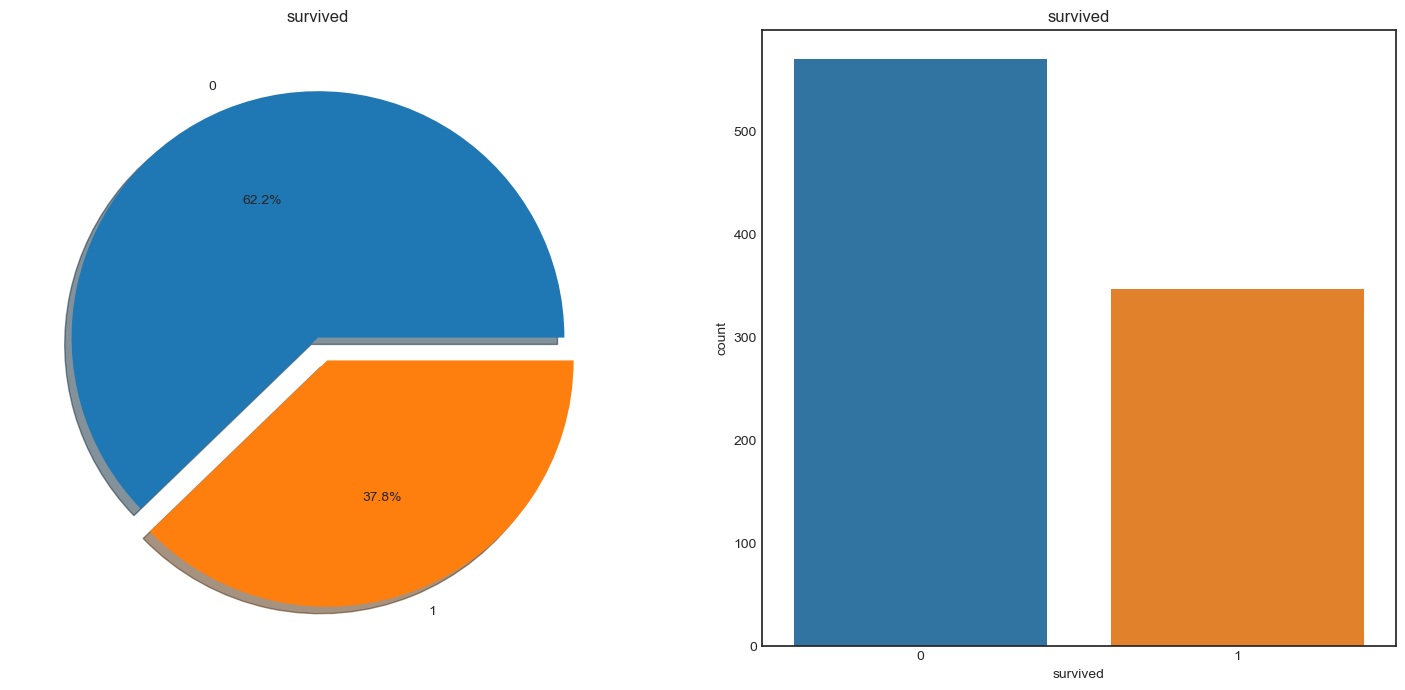

In [19]:
f,ax=plt.subplots(1,2,figsize=(18,8))
ori_tr['survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('survived')
ax[0].set_ylabel('')
sns.countplot('survived',data=ori_tr,ax=ax[1])
ax[1].set_title('survived')
plt.show()

In [20]:
ori_tr.groupby(['gender','survived'])['survived'].count()

gender  survived
female  0            54
        1           273
male    0           516
        1            73
Name: survived, dtype: int64

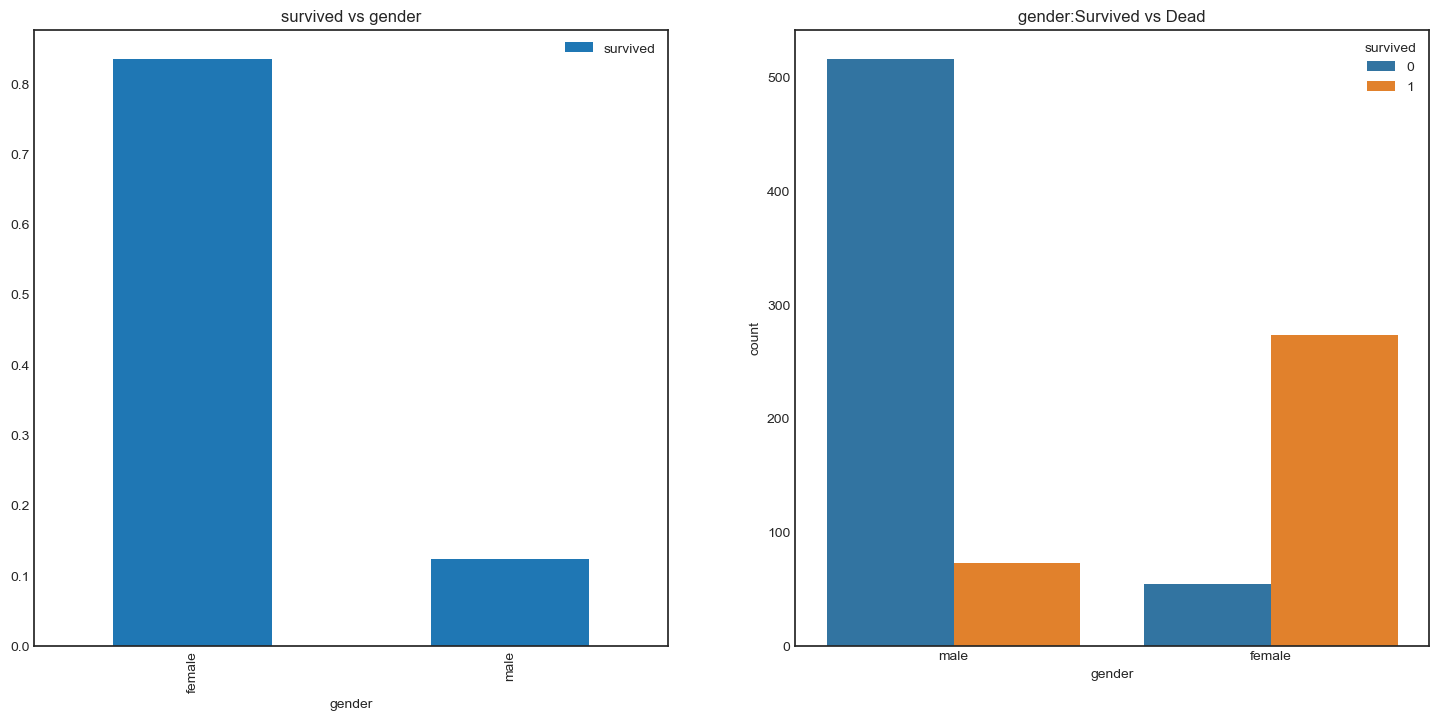

In [21]:
f,ax=plt.subplots(1,2,figsize=(18,8))
ori_tr[['gender','survived']].groupby(['gender']).mean().plot.bar(ax=ax[0])
ax[0].set_title('survived vs gender')
sns.countplot('gender',hue='survived',data=ori_tr,ax=ax[1])
ax[1].set_title('gender:Survived vs Dead')
plt.show()

pclass

In [22]:
pd.crosstab(ori_tr.pclass,ori_tr.survived,margins=True).style.background_gradient(cmap='summer_r')

survived,0,1,All
pclass,,,
1,96,131,227
2,118,76,194
3,356,139,495
All,570,346,916


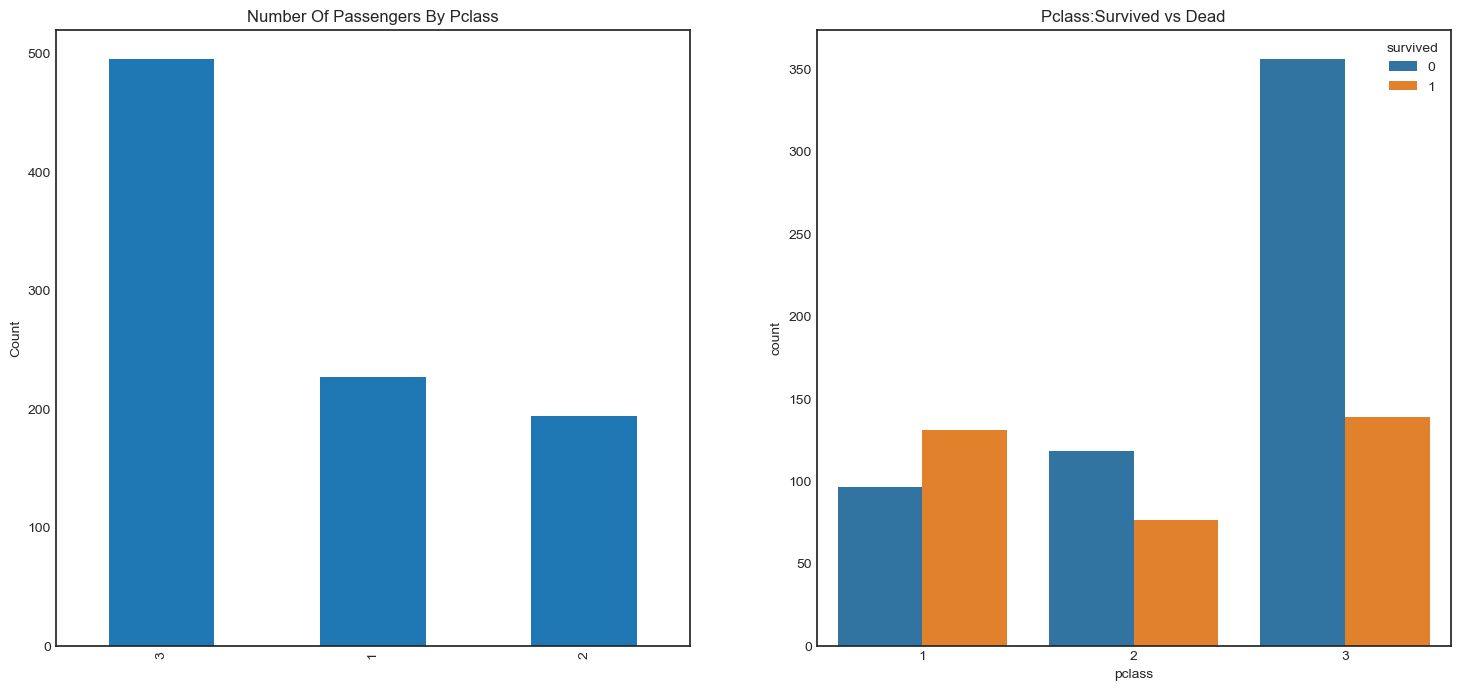

In [23]:
f,ax=plt.subplots(1,2,figsize=(18,8))
ori_tr['pclass'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('pclass',hue='survived',data=ori_tr,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

In [24]:
pd.crosstab([ori_tr.gender, ori_tr.survived],ori_tr.pclass,margins=True).style.background_gradient(cmap='summer_r')

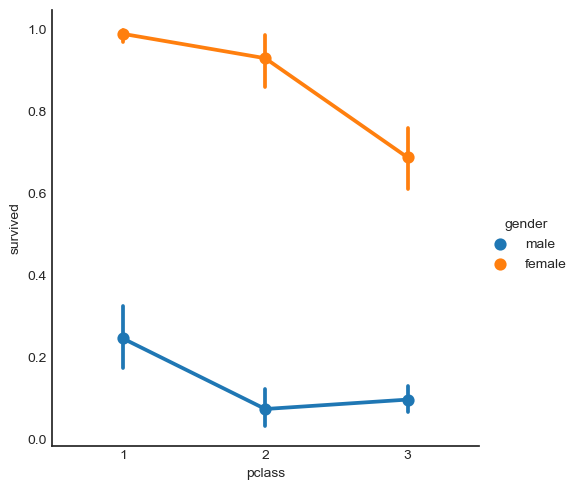

In [25]:
sns.factorplot('pclass','survived',hue='gender',data=ori_tr)
plt.show()

age

In [26]:
print('Oldest Passenger was of:',ori_tr['age'].max(),'Years')
print('Youngest Passenger was of:',ori_tr['age'].min(),'Years')
print('Average Age on the ship:',ori_tr['age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.17 Years
Average Age on the ship: 29.69836956521739 Years


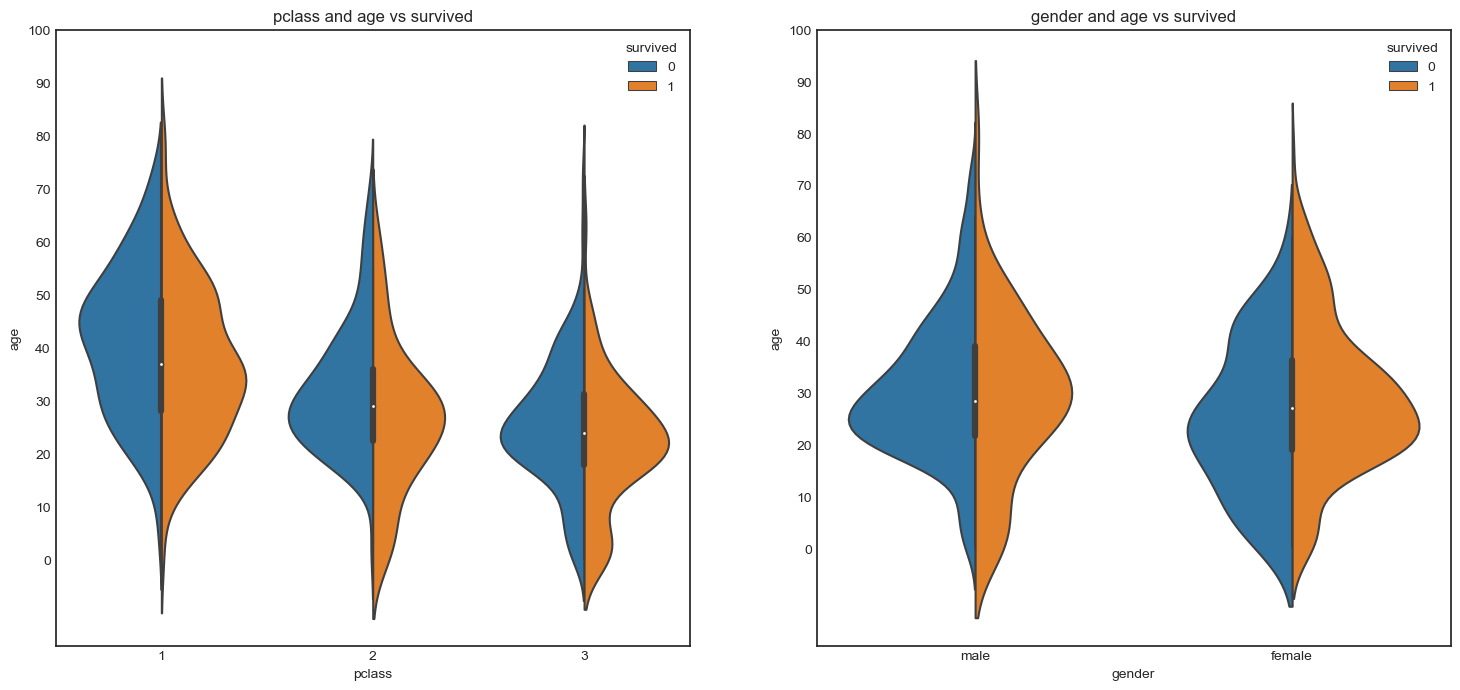

In [27]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("pclass","age", hue="survived", data=ori_tr,split=True,ax=ax[0])
ax[0].set_title('pclass and age vs survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("gender","age", hue="survived", data=ori_tr,split=True,ax=ax[1])
ax[1].set_title('gender and age vs survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

In [28]:
ori_tr['initial']=0
for i in ori_tr:
    ori_tr['initial']=ori_tr.name.str.extract('([A-Za-z]+)\.') 

In [29]:
pd.crosstab(ori_tr.initial, ori_tr.gender).T.style.background_gradient(cmap='summer_r') 
#Checking the Initials with the Sex

initial,Capt,Col,Countess,Don,Dr,Jonkheer,Major,Master,Miss,Mlle,Mr,Mrs,Ms,Rev,Sir
gender,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,0,0,185,1,0,138,1,0,0
male,1,3,0,1,4,1,2,42,0,0,528,0,0,6,1


In [30]:
ori_tr['initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [31]:
ori_tr.groupby('initial')['age'].mean() #lets check the average age by Initials

initial
Master     5.352286
Miss      21.788693
Mr        32.264286
Mrs       36.796610
Other     44.400000
Name: age, dtype: float64

Filling NaN Ages

In [32]:
ori_tr.loc[(ori_tr.age.isnull())&(ori_tr.initial=='Mr'),'age']=33
ori_tr.loc[(ori_tr.age.isnull())&(ori_tr.initial=='Mrs'),'age']=36
ori_tr.loc[(ori_tr.age.isnull())&(ori_tr.initial=='Master'),'age']=5
ori_tr.loc[(ori_tr.age.isnull())&(ori_tr.initial=='Miss'),'age']=22
ori_tr.loc[(ori_tr.age.isnull())&(ori_tr.initial=='Other'),'age']=46

In [33]:
ori_tr.age.isnull().any() #So no null values left finally 

False

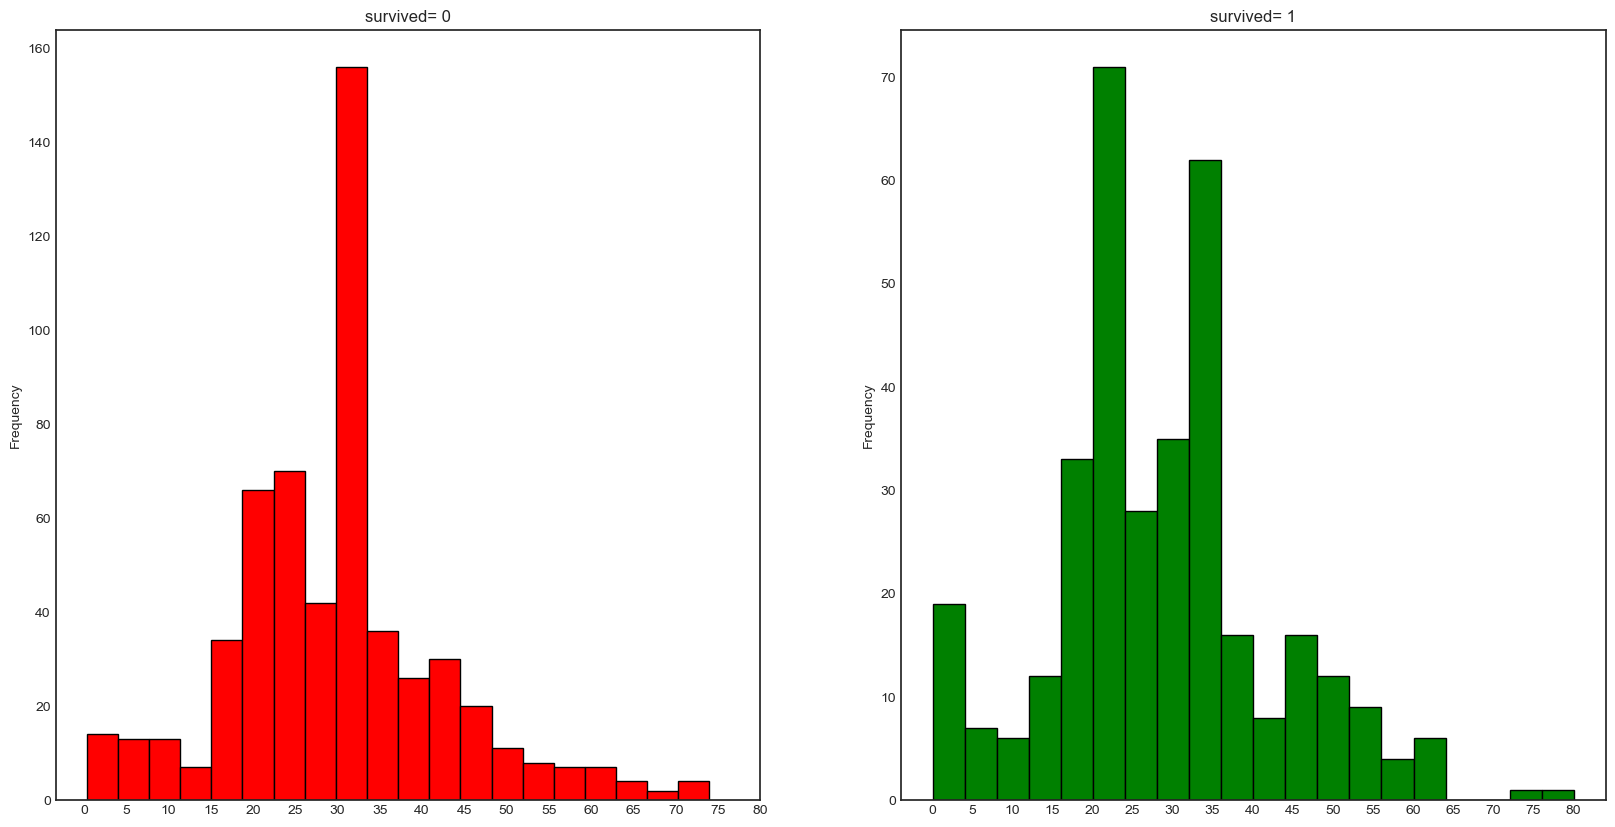

In [34]:
f,ax=plt.subplots(1,2,figsize=(20,10))
ori_tr[ori_tr['survived']==0].age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
ori_tr[ori_tr['survived']==1].age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

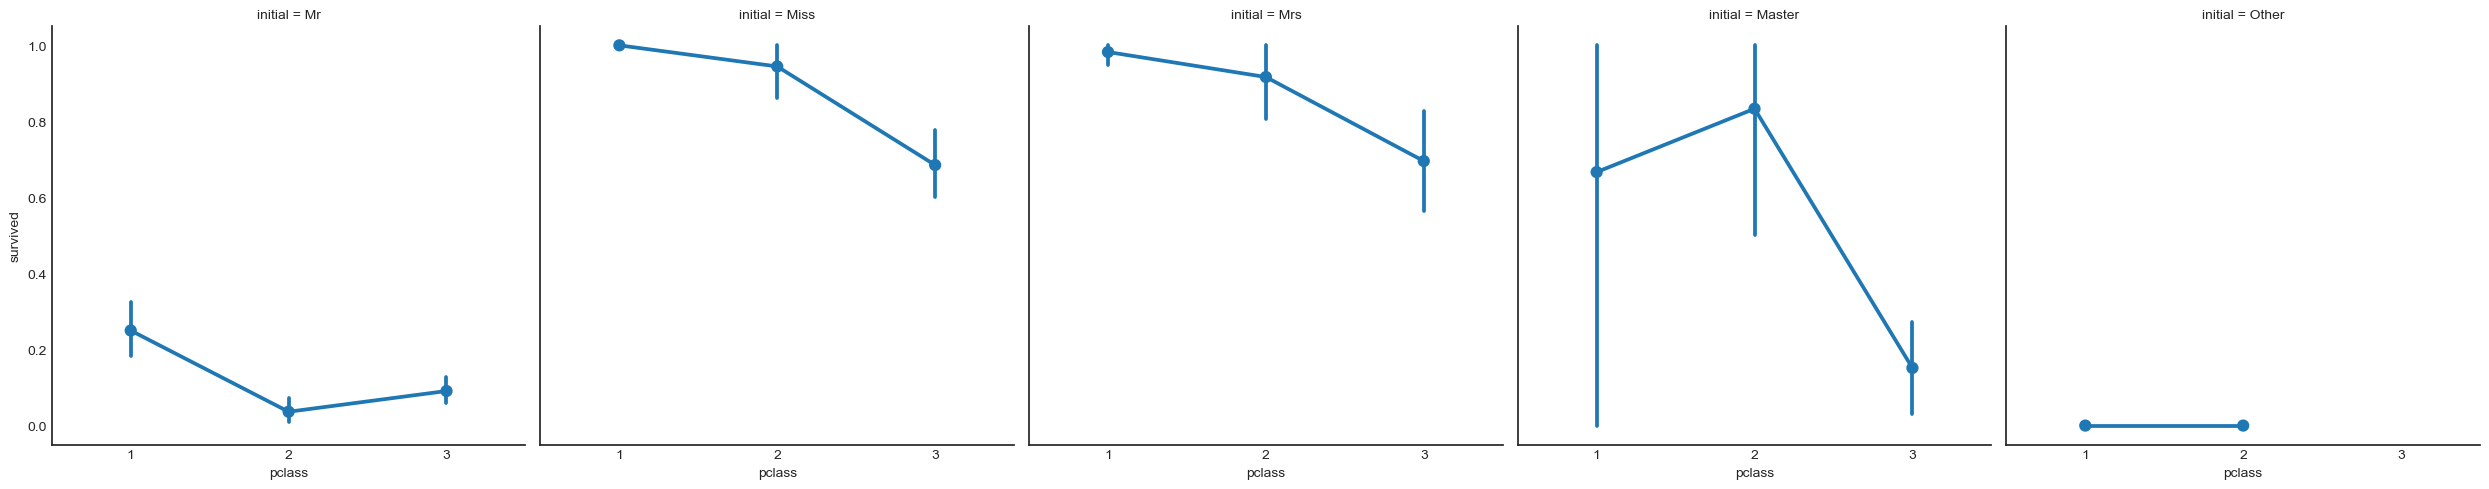

In [35]:
sns.factorplot('pclass','survived',col='initial',data=ori_tr)
plt.show()

Embarked--> Categorical Value

In [36]:
pd.crosstab([ori_tr.embarked,ori_tr.pclass],[ori_tr.gender,ori_tr.survived],margins=True).style.background_gradient(cmap='summer_r')

Chances for Survival by Port Of Embarkation

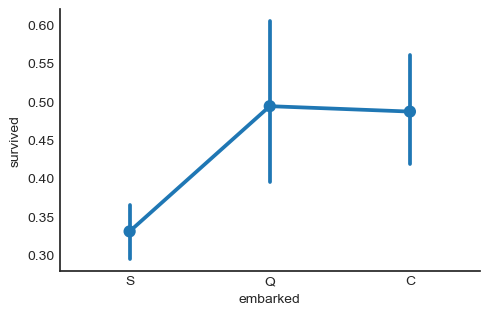

In [37]:
sns.factorplot('embarked','survived',data=ori_tr)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

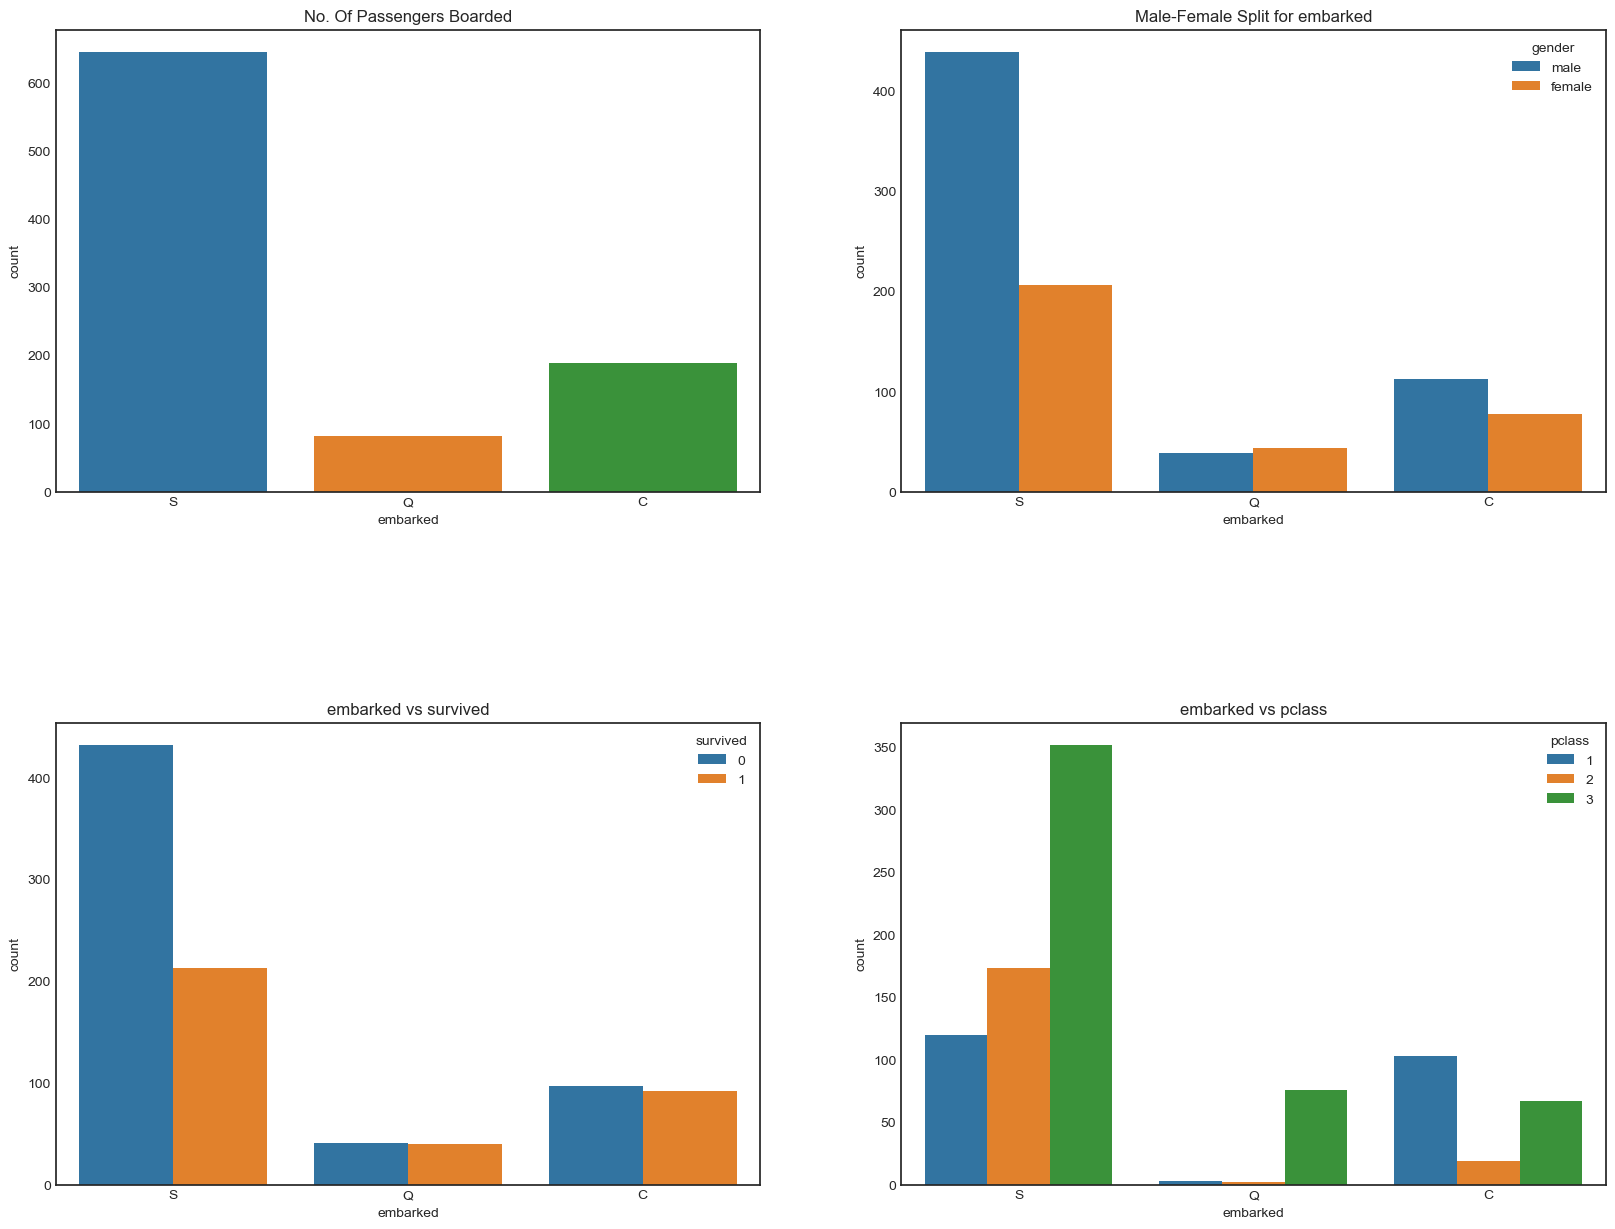

In [38]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('embarked',data=ori_tr,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('embarked',hue='gender',data=ori_tr,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for embarked')
sns.countplot('embarked',hue='survived',data=ori_tr,ax=ax[1,0])
ax[1,0].set_title('embarked vs survived')
sns.countplot('embarked',hue='pclass',data=ori_tr,ax=ax[1,1])
ax[1,1].set_title('embarked vs pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

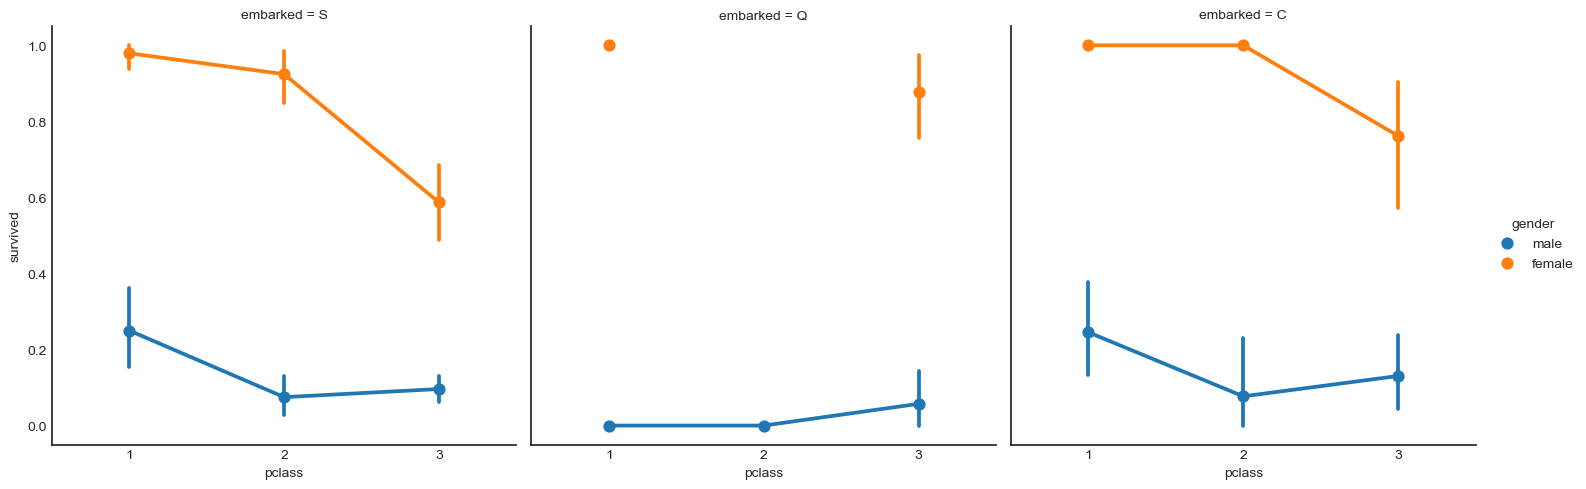

In [39]:
sns.factorplot('pclass','survived',hue='gender',col='embarked',data=ori_tr)
plt.show()

Filling Embarked NaN

In [40]:
ori_tr['embarked'].fillna('S',inplace=True)

In [41]:
ori_tr.embarked.isnull().any()# Finally No NaN values

False

SibSip-->Discrete Feature

In [42]:
ori_tr.cabin.isnull().sum()

718

In [43]:
pd.crosstab([ori_tr.sibsp],ori_tr.survived).style.background_gradient(cmap='summer_r')

survived,0,1
sibsp,,
0,414,207
1,104,118
2,17,13
3,13,4
4,14,2
5,3,1
8,5,1


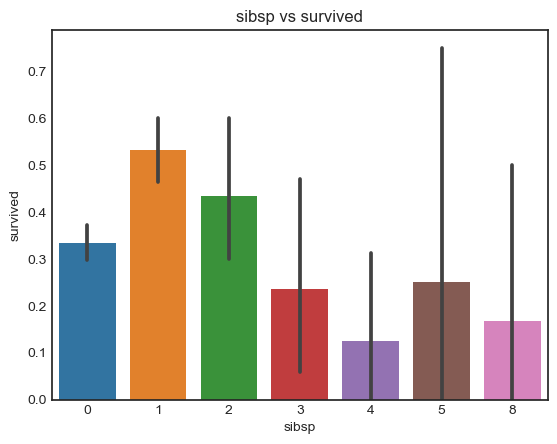

In [44]:

sns.barplot('sibsp','survived',data=ori_tr)
plt.title('sibsp vs survived')
plt.show()


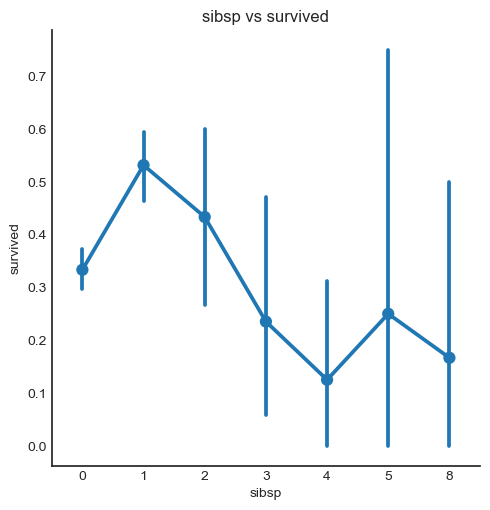

In [45]:
sns.factorplot('sibsp','survived',data=ori_tr)
plt.title('sibsp vs survived')
plt.show()

In [46]:
pd.crosstab(ori_tr.sibsp,ori_tr.pclass).style.background_gradient(cmap='summer_r')

pclass,1,2,3
sibsp,,,
0,139,129,353
1,80,56,86
2,5,8,17
3,3,1,13
4,0,0,16
5,0,0,4
8,0,0,6


In [47]:
pd.crosstab(ori_tr.parch, ori_tr.pclass).style.background_gradient(cmap='summer_r')

pclass,1,2,3
parch,,,
0,179,150,380
1,31,28,62
2,15,14,41
3,2,2,2
4,0,0,4
5,0,0,3
6,0,0,2
9,0,0,1


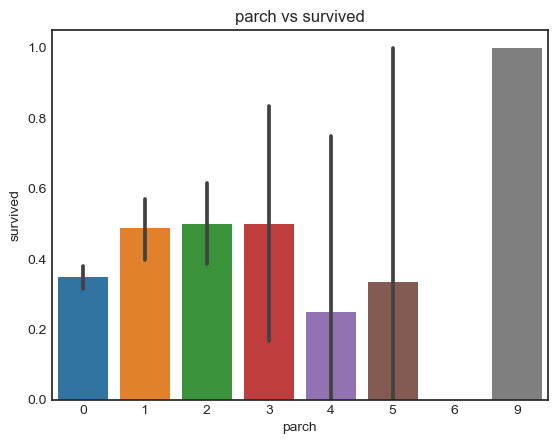

In [48]:
sns.barplot('parch','survived',data=ori_tr)
plt.title('parch vs survived')
plt.show()


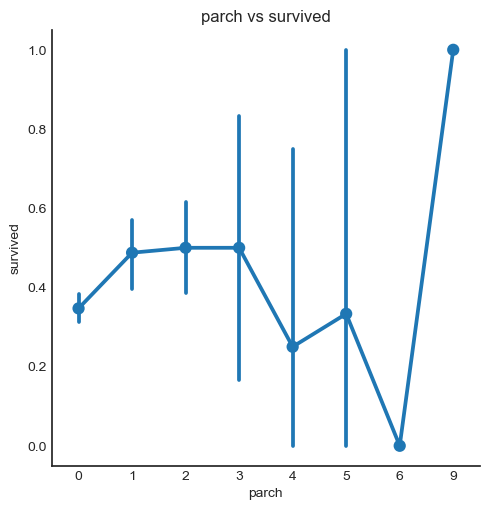

In [49]:
sns.factorplot('parch','survived',data=ori_tr)
plt.title('parch vs survived')
plt.show()

In [50]:
print('Highest fare was:',ori_tr['fare'].max())
print('Lowest fare was:',ori_tr['fare'].min())
print('Average fare was:',ori_tr['fare'].mean())

Highest fare was: 512.3292
Lowest fare was: 0.0
Average fare was: 32.4027104803493


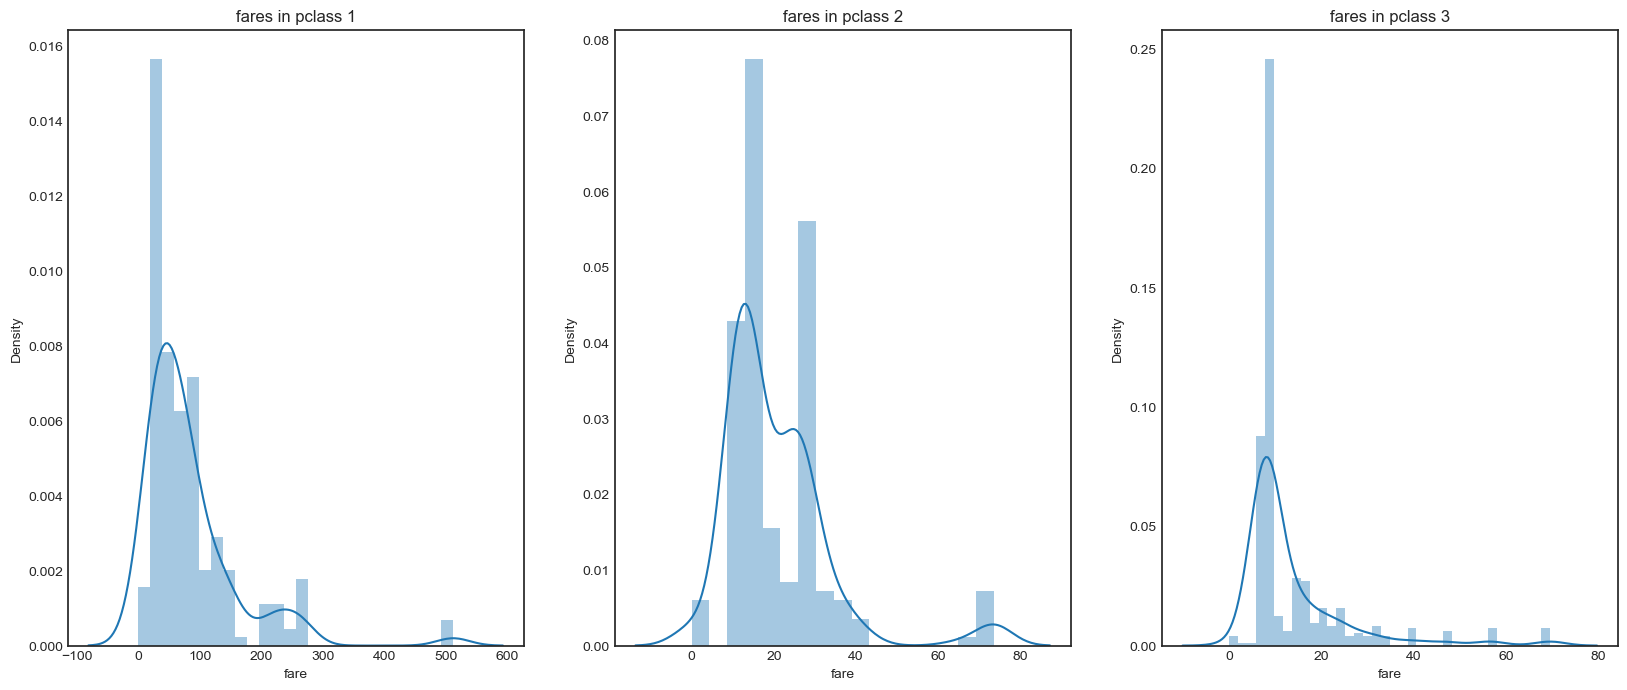

In [51]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(ori_tr[ori_tr['pclass']==1].fare,ax=ax[0])
ax[0].set_title('fares in pclass 1')
sns.distplot(ori_tr[ori_tr['pclass']==2].fare,ax=ax[1])
ax[1].set_title('fares in pclass 2')
sns.distplot(ori_tr[ori_tr['pclass']==3].fare,ax=ax[2])
ax[2].set_title('fares in pclass 3')
plt.show()

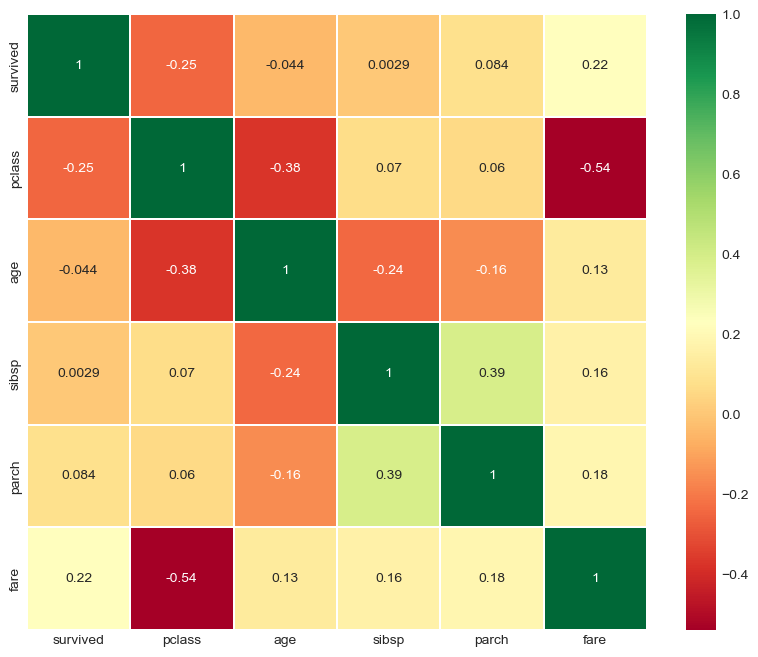

In [52]:
sns.heatmap(ori_tr.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #ori_tr.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [53]:
ori_tr['age_band']=0
ori_tr.loc[ori_tr['age']<=16,'age_band']=0
ori_tr.loc[(ori_tr['age']>16)&(ori_tr['age']<=32),'age_band']=1
ori_tr.loc[(ori_tr['age']>32)&(ori_tr['age']<=48),'age_band']=2
ori_tr.loc[(ori_tr['age']>48)&(ori_tr['age']<=64),'age_band']=3
ori_tr.loc[ori_tr['age']>64,'age_band']=4
ori_tr.head(2)

,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,initial,age_band
0,0,2,"Wheeler, Mr. Edwin Frederick""""",male,33.0,0,0,SC/PARIS 2159,12.875,NaN,S,Mr,2
1,0,3,"Henry, Miss. Delia",female,22.0,0,0,382649,7.750,NaN,Q,Miss,1


In [54]:
ori_tr['age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')#checking the number of passenegers in each band

,age_band
1,411
2,331
0,98
3,66
4,10


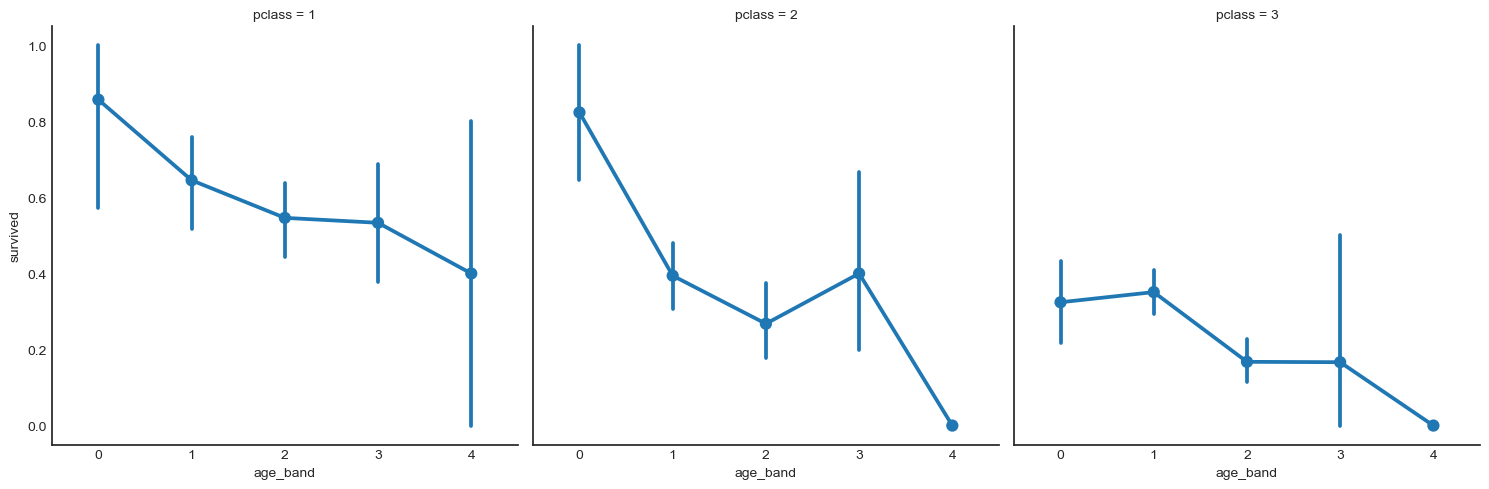

In [55]:
sns.factorplot('age_band','survived',data=ori_tr,col='pclass')
plt.show()

In [56]:
ori_tr['family_size']=0
ori_tr['family_size']=ori_tr['parch']+ori_tr['sibsp']#family size
ori_tr['alone']=0
ori_tr.loc[ori_tr.family_size==0,'alone']=1#Alone
ori_tr['family_size']

0      0
1      0
2      2
3      0
4      1
      ..
911    1
912    0
913    0
914    0
915    0
Name: family_size, Length: 916, dtype: int64

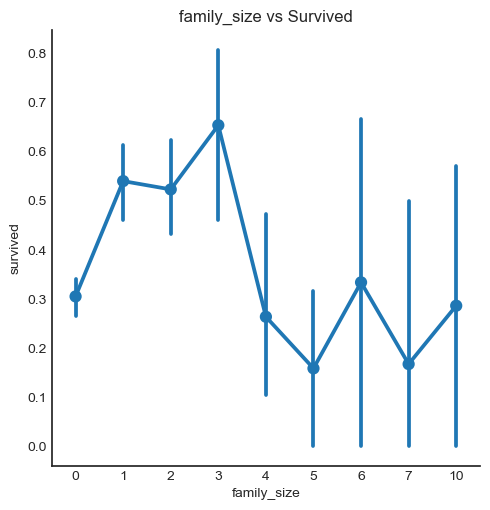

In [57]:
sns.factorplot('family_size','survived', data=ori_tr)
plt.title('family_size vs Survived')
plt.show()


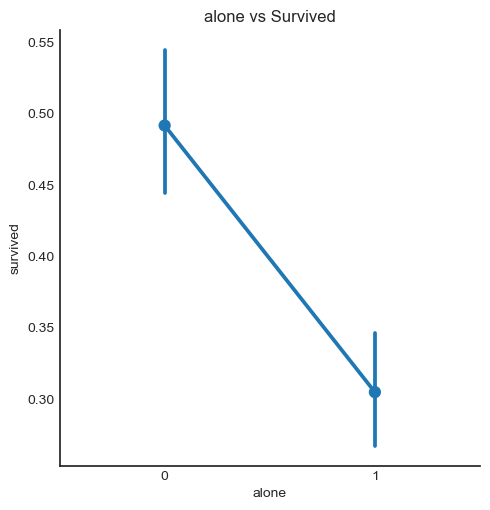

In [58]:
sns.factorplot('alone','survived', data=ori_tr)
plt.title('alone vs Survived')
plt.show()

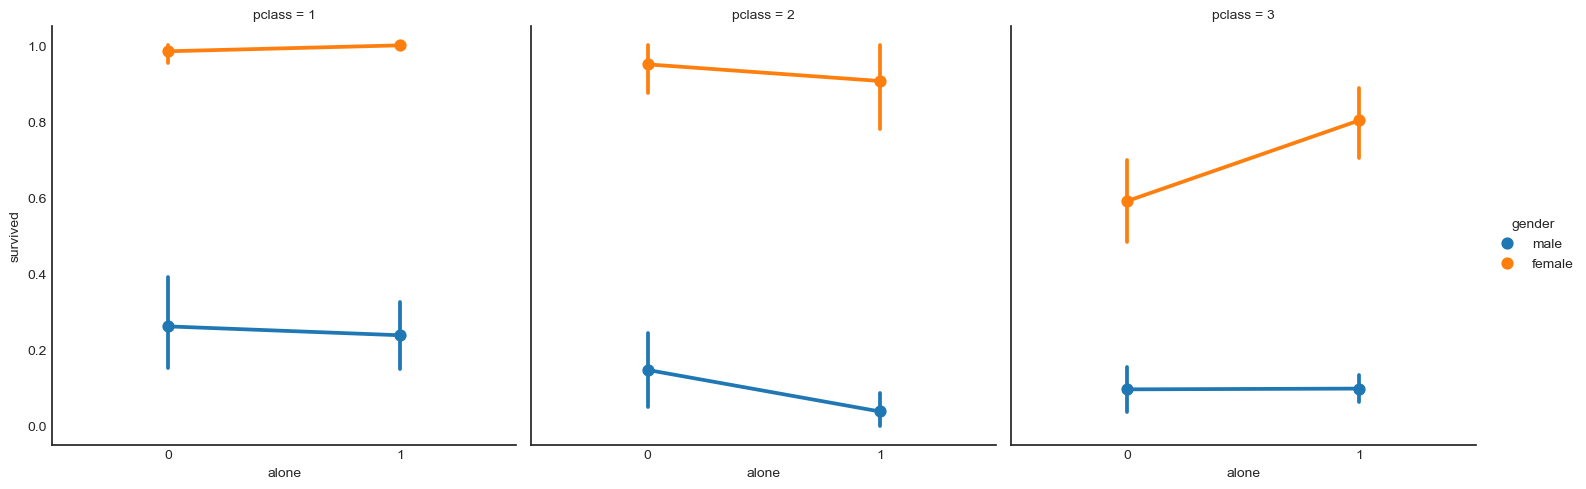

In [59]:
sns.factorplot('alone','survived',data=ori_tr,hue='gender',col='pclass')
plt.show()

In [60]:
ori_tr.head()

,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,initial,age_band,family_size,alone
0,0,2,"Wheeler, Mr. Edwin Frederick""""",male,33.0,0,0,SC/PARIS 2159,12.8750,NaN,S,Mr,2,0,1
1,0,3,"Henry, Miss. Delia",female,22.0,0,0,382649,7.7500,NaN,Q,Miss,1,0,1
2,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.0,1,1,12749,93.5000,B69,S,Mrs,3,2,0
3,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,NaN,S,Mr,1,0,1
4,0,2,"Hold, Mr. Stephen",male,44.0,1,0,26707,26.0000,NaN,S,Mr,2,1,0


In [61]:
ori_tr['fare_range']=pd.qcut(ori_tr['fare'],4)
ori_tr.groupby(['fare_range'])['survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,survived
fare_range,
"(-0.001, 7.896]",0.238095
"(7.896, 14.458]",0.275109
"(14.458, 30.018]",0.440529
"(30.018, 512.329]",0.558952


In [62]:
ori_tr['fare_cat']=0
ori_tr.loc[ori_tr['fare']<=7.91,'fare_cat']=0
ori_tr.loc[(ori_tr['fare']>7.91)&(ori_tr['fare']<=14.454),'fare_cat']=1
ori_tr.loc[(ori_tr['fare']>14.454)&(ori_tr['fare']<=31),'fare_cat']=2
ori_tr.loc[(ori_tr['fare']>31)&(ori_tr['fare']<=513),'fare_cat']=3

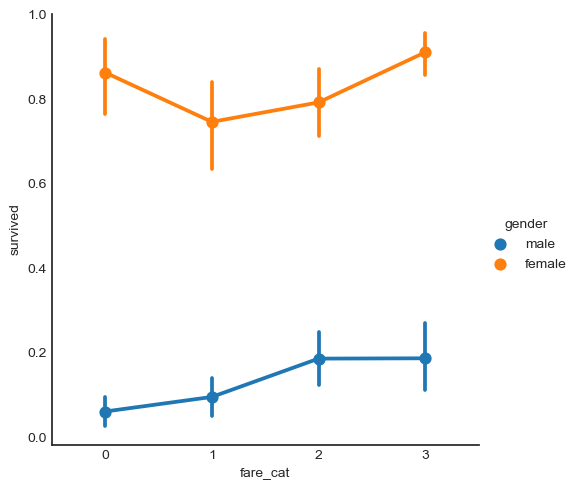

In [63]:
sns.factorplot('fare_cat','survived',data=ori_tr,hue='gender')
plt.show()

In [64]:
ori_train.head()

,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,2,"Wheeler, Mr. Edwin Frederick""""",male,NaN,0,0,SC/PARIS 2159,12.8750,NaN,S
1,0,3,"Henry, Miss. Delia",female,NaN,0,0,382649,7.7500,NaN,Q
2,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.0,1,1,12749,93.5000,B69,S
3,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,NaN,S
4,0,2,"Hold, Mr. Stephen",male,44.0,1,0,26707,26.0000,NaN,S


In [65]:
ori_tr['gender'].replace(['male','female'],[0,1],inplace=True)
ori_tr['embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
ori_tr['initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

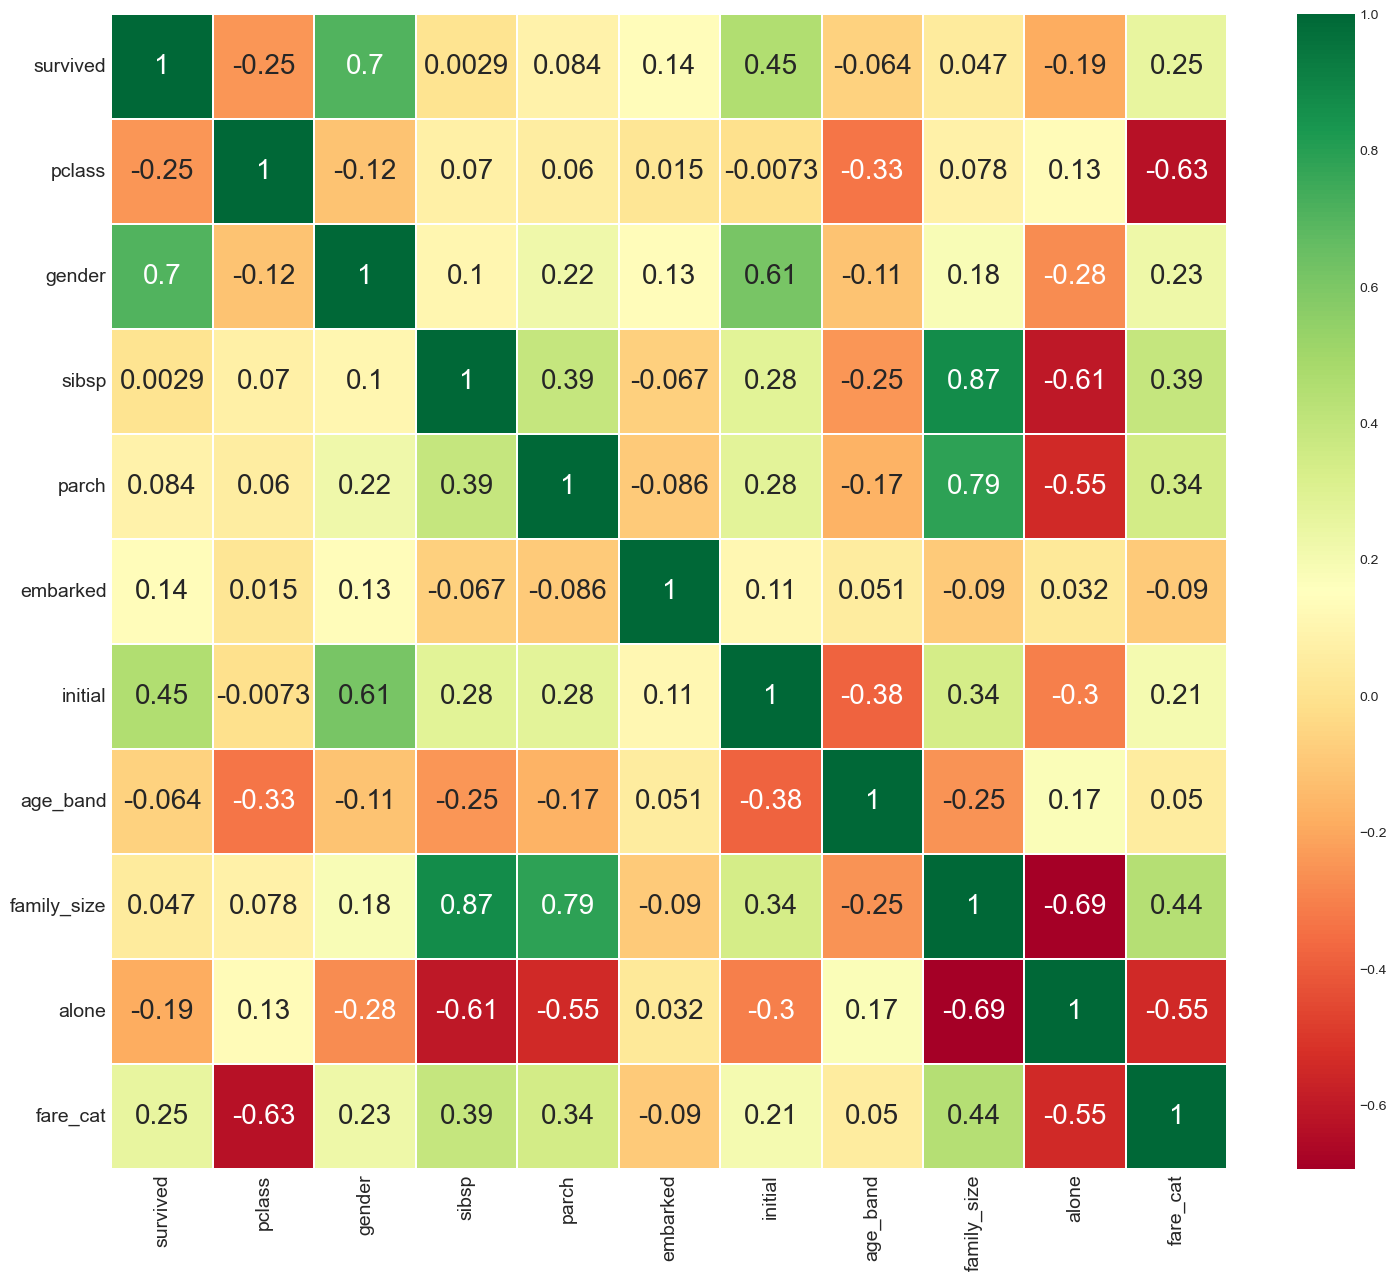

In [66]:
ori_tr.drop(['name','age','ticket','fare','cabin','fare_range'],axis=1,inplace=True)
sns.heatmap(ori_tr.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [67]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [68]:
train,test=train_test_split(ori_tr,test_size=0.3,random_state=0,stratify=ori_tr['survived'])
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=ori_tr[ori_tr.columns[1:]]
Y=ori_tr['survived']

In [69]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,test_Y))

Accuracy for rbf SVM is  0.84


In [70]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(train_X,train_Y)
prediction2=model.predict(test_X)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction2,test_Y))

Accuracy for linear SVM is 0.850909090909091


In [71]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.8472727272727273


In [72]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

The accuracy of the Decision Tree is 0.7963636363636364


In [73]:
model=KNeighborsClassifier() 
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,test_Y))

The accuracy of the KNN is 0.8218181818181818


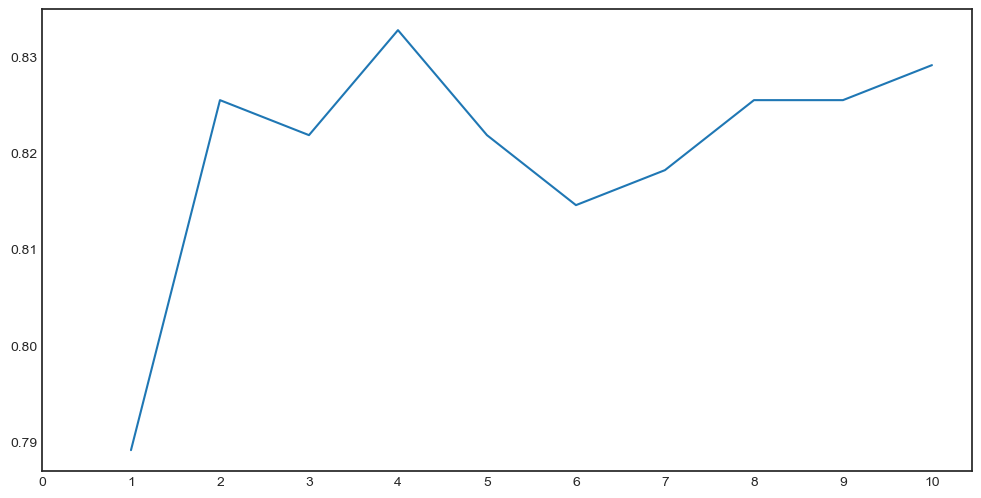

Accuracies for different values of n are: [0.78909091 0.82545455 0.82181818 0.83272727 0.82181818 0.81454545
 0.81818182 0.82545455 0.82545455 0.82909091] with the max value as  0.8327272727272728


In [74]:
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())

In [75]:
model=GaussianNB()
model.fit(train_X,train_Y)
prediction6=model.predict(test_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,test_Y))

The accuracy of the NaiveBayes is 0.8290909090909091


In [76]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_Y))

The accuracy of the Random Forests is 0.8254545454545454


In [79]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.861312,0.034321
Radial Svm,0.869052,0.038190
Logistic Regression,0.855877,0.030860
KNN,0.840624,0.029602
Decision Tree,0.844983,0.023678
Naive Bayes,0.855936,0.036873
Random Forest,0.842881,0.028854


<AxesSubplot:>

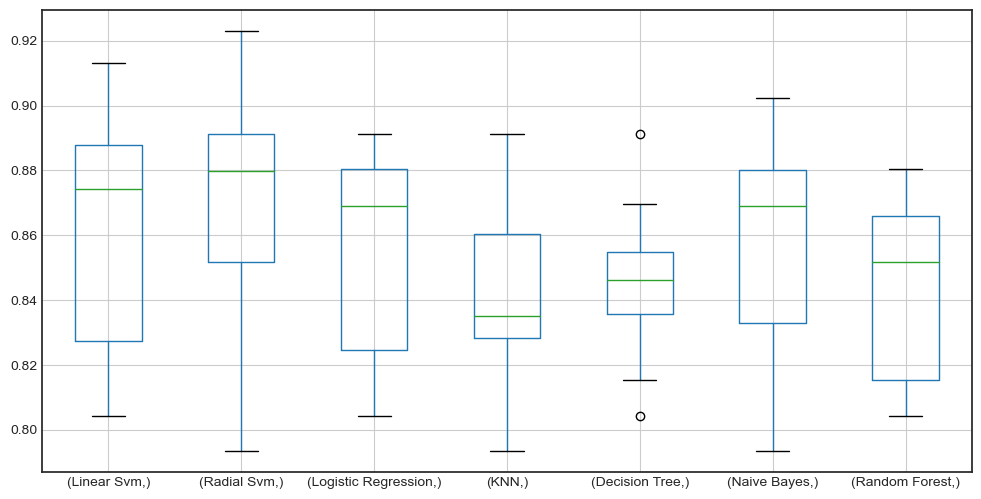

In [80]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()

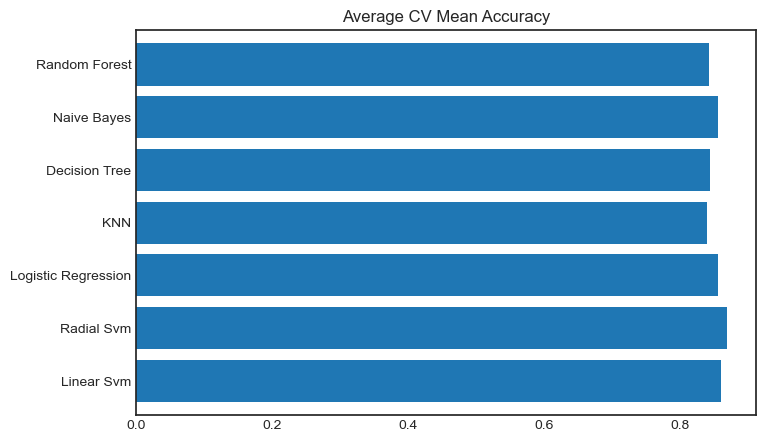

In [81]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

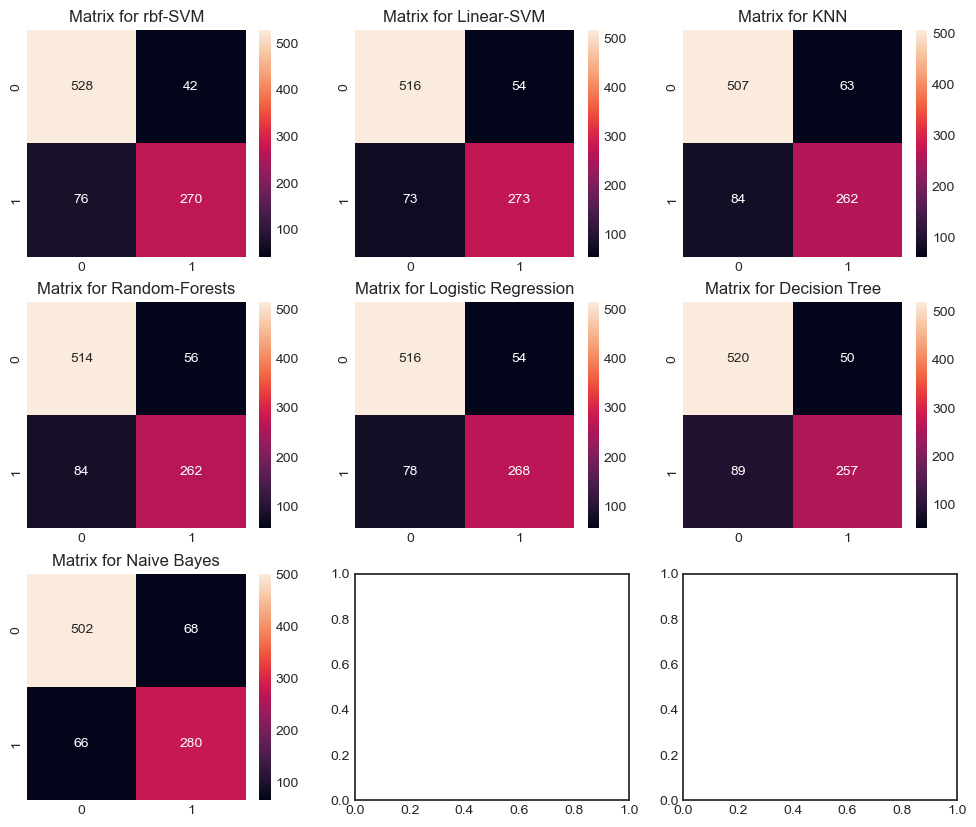

In [82]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

In [83]:
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.8657400807792823
SVC(C=0.6, gamma=0.1)


In [84]:
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.8559158945117605
RandomForestClassifier(n_estimators=500, random_state=0)


In [85]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('svm',svm.SVC(kernel='linear',probability=True))
                                             ], 
                       voting='soft').fit(train_X,train_Y)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X,test_Y))
cross=cross_val_score(ensemble_lin_rbf,X,Y, cv = 10,scoring = "accuracy")
print('The cross validated score is',cross.mean())

The accuracy for ensembled model is: 0.8472727272727273
The cross validated score is 0.8679646440516006


In [86]:
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),random_state=0,n_estimators=700)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged KNN is:',result.mean())

The accuracy for bagged KNN is: 0.8181818181818182
The cross validated score for bagged KNN is: 0.8494147157190636


In [87]:
model=BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged Decision Tree is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())

The accuracy for bagged Decision Tree is: 0.8109090909090909
The cross validated score for bagged Decision Tree is: 0.8472527472527472


In [88]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 0.8701146679407549


In [89]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 0.85376254180602


In [90]:
import xgboost as xg
xgboost=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(xgboost,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

ModuleNotFoundError: No module named 'xgboost'

In [92]:
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
0.8701176051318603
AdaBoostClassifier(learning_rate=0.05, n_estimators=300)


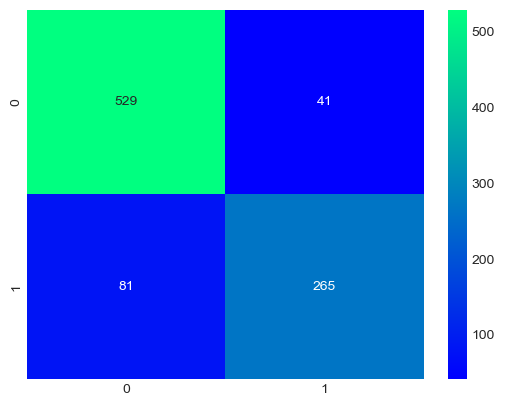

In [93]:
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.05)
result=cross_val_predict(ada,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,result),cmap='winter',annot=True,fmt='2.0f')
plt.show()

NameError: name 'xg' is not defined

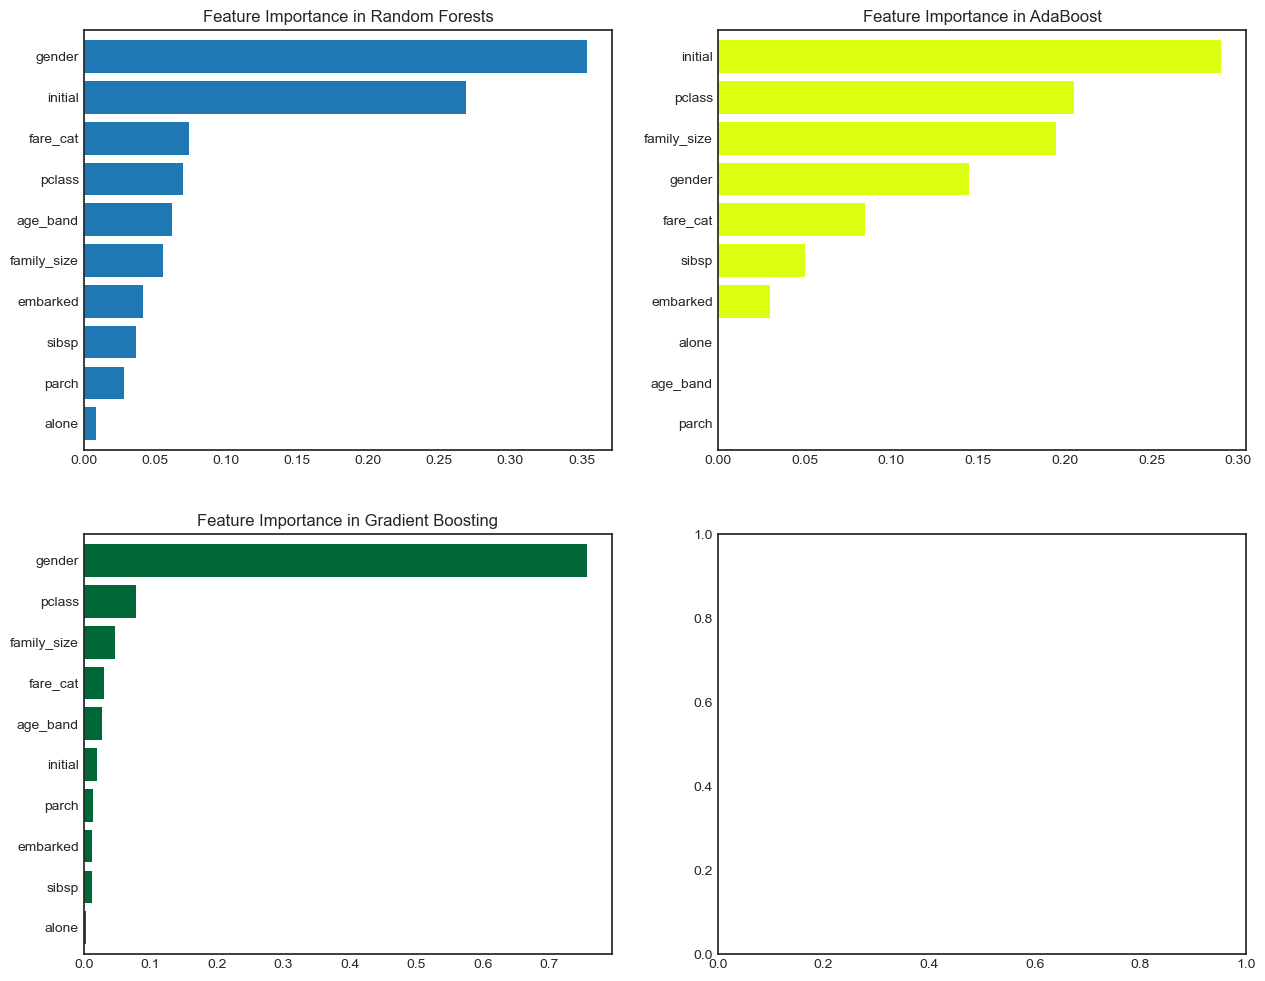

In [94]:
f,ax=plt.subplots(2,2,figsize=(15,12))
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')
model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')
model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')
model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')
plt.show()